
# Daten fürs Training: Train / Validation / Test Split

## Warum ist dieses Thema wichtig?

Wenn du ein Modell mit Daten trainierst, ist es **nicht fair**, das Modell hinterher auf **denselben Daten** zu testen. 
Das wäre wie ein Schüler, der die Prüfungsfragen vorher kennt – natürlich macht er dann ein gutes Resultat!

Damit ein Modell **wirklich gut** ist, muss es auch auf **neuen, unbekannten Daten** funktionieren.

## Was lernst du in diesem Notebook?

- **Warum** wir einen Datensatz aufteilen müssen
- **Wie** man einen Datensatz in Train-, Validation- und Test-Set aufteilt
- **Welche Rolle** jeder Teil spielt
- **Interaktiv** sehen, wie die Aufteilung die Modellqualität beeinflusst

> **Merksatz:**  
> **Train-Set** = zum Lernen  
> **Validation-Set** = zum Überprüfen während des Trainings  
> **Test-Set** = zum finalen Testen (nur einmal am Schluss!)



## 1. Bibliotheken laden

Wir verwenden hier nur:

- `numpy` für Daten (Zahlen)
- `matplotlib` für die Visualisierung
- `ipywidgets` für die interaktiven Schieberegler

In deiner JupyterLite-Umgebung sind diese Bibliotheken bereits installiert.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline


## 2. Beispiel-Datensatz: Iris-Klassifikation

Wir nehmen den **Iris-Datensatz** aus scikit-learn mit nur **2 Features** (Sepal Length und Sepal Width):

- Eingabe: 2D-Messwerte von Blütenkelchen
- Ziel: Klassifikation der Iris-Art (3 Klassen)

Mit nur 2 Features ist die Aufgabe schwieriger für Logistic Regression → 
man sieht besser, wie mehr Trainingsdaten helfen!

In [2]:
from sklearn.datasets import load_iris

# Iris-Datensatz laden (nur 2 Features für bessere Visualisierung)
iris = load_iris()
X = iris.data[:, :2]    # Nur Sepal Length und Sepal Width
y = iris.target         # 3 Klassen

n_samples = len(X)
print(f"Anzahl Datenpunkte insgesamt: {n_samples}")
print(f"Features: {iris.feature_names[:2]}")
print(f"Klassen: {iris.target_names} ({len(np.unique(y))} Klassen)")


Anzahl Datenpunkte insgesamt: 150
Features: ['sepal length (cm)', 'sepal width (cm)']
Klassen: ['setosa' 'versicolor' 'virginica'] (3 Klassen)


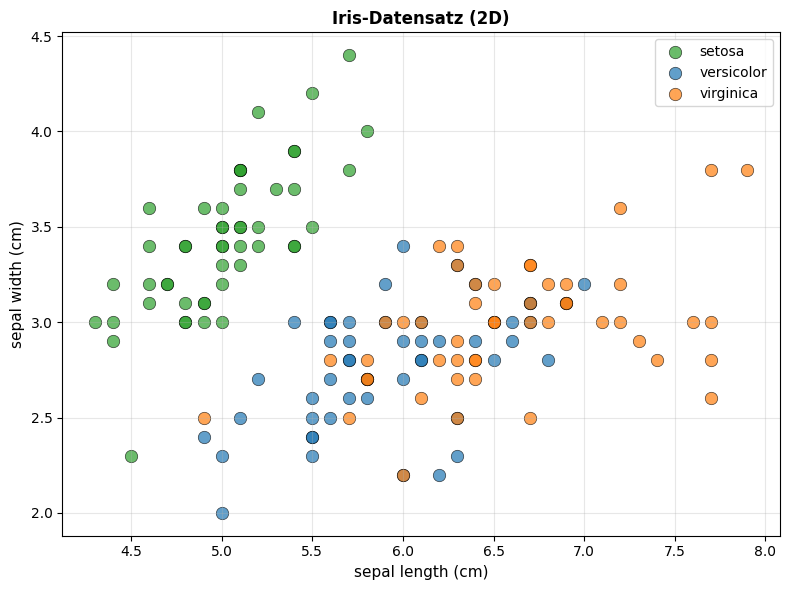

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter-Plot der Iris-Daten nach Klasse gefärbt
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']
for i, (label, color) in enumerate(zip(iris.target_names, colors)):
    idx = y == i
    ax.scatter(X[idx, 0], X[idx, 1], c=color, label=label, s=80, alpha=0.7, edgecolors='k', linewidth=0.5)

ax.set_xlabel(iris.feature_names[0], fontsize=11)
ax.set_ylabel(iris.feature_names[1], fontsize=11)
ax.set_title('Iris-Datensatz (2D)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Die 3 Iris-Arten im Detail

Der Iris-Datensatz enthält **3 verschiedene Arten** von Iris-Blüten:

1. **Setosa** (grün) – Klein und kompakt
2. **Versicolor** (blau) – Mittlere Größe
3. **Virginica** (orange) – Groß und auffällig

**Deine Aufgabe als ML-Modell:**  
Schau auf die Sepal-Länge und -Breite → **Erkenne automatisch, welche Art das ist!**

Das ist schwieriger als es klingt, weil sich die Arten teilweise überlappen (z.B. manche Versicolor und Virginica sind sich ähnlich).

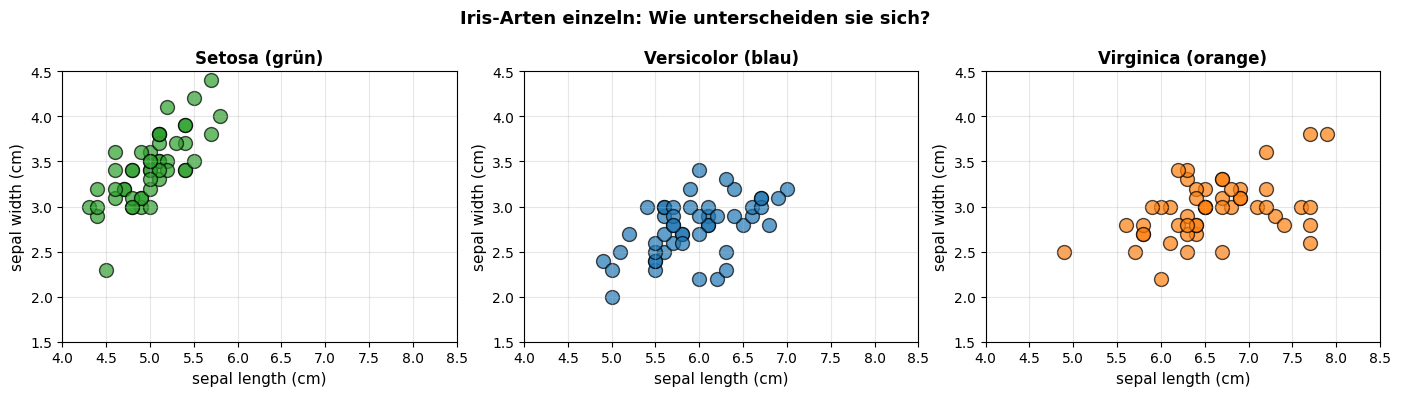


Statistiken für jede Iris-Art:

SETOSA (grün):
  Anzahl: 50 Blüten
  Sepal Length: 4.3 - 5.8 cm (Ø 5.0)
  Sepal Width:  2.3 - 4.4 cm (Ø 3.4)

VERSICOLOR (blau):
  Anzahl: 50 Blüten
  Sepal Length: 4.9 - 7.0 cm (Ø 5.9)
  Sepal Width:  2.0 - 3.4 cm (Ø 2.8)

VIRGINICA (orange):
  Anzahl: 50 Blüten
  Sepal Length: 4.9 - 7.9 cm (Ø 6.6)
  Sepal Width:  2.2 - 3.8 cm (Ø 3.0)


In [4]:
# Jede Klasse einzeln visualisieren
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

colors = ['#2ca02c', '#1f77b4', '#ff7f0e']
titles = ['Setosa (grün)', 'Versicolor (blau)', 'Virginica (orange)']

for ax, i, color, title in zip(axes, range(3), colors, titles):
    idx = y == i
    ax.scatter(X[idx, 0], X[idx, 1], c=color, s=100, alpha=0.7, edgecolors='k', linewidth=1)
    ax.set_xlabel(iris.feature_names[0], fontsize=11)
    ax.set_ylabel(iris.feature_names[1], fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(4, 8.5)
    ax.set_ylim(1.5, 4.5)

plt.suptitle('Iris-Arten einzeln: Wie unterscheiden sie sich?', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistiken für jede Klasse
print("\nStatistiken für jede Iris-Art:")
print("="*60)
for i, name in enumerate(iris.target_names):
    idx = y == i
    print(f"\n{name.upper()} ({['grün', 'blau', 'orange'][i]}):")
    print(f"  Anzahl: {np.sum(idx)} Blüten")
    print(f"  Sepal Length: {X[idx, 0].min():.1f} - {X[idx, 0].max():.1f} cm (Ø {X[idx, 0].mean():.1f})")
    print(f"  Sepal Width:  {X[idx, 1].min():.1f} - {X[idx, 1].max():.1f} cm (Ø {X[idx, 1].mean():.1f})")


## 3. Interaktive Visualisierung von Train / Validation / Test

### Die drei Sets erklärt:

**Train-Set (grün):**
- Das größte Set (z.B. 60% der Daten)
- Wird benutzt, um das Modell zu **trainieren**
- Das Modell "sieht" diese Daten und lernt daraus
- **Ziel:** Die Parameter des Modells optimieren

**Validation-Set (blau):**
- Mittleres Set (z.B. 20% der Daten)
- Wird während des Trainings benutzt, um das Modell zu **überprüfen**
- Hilft dir, die beste **Version** des Modells zu finden (z.B. beste Hyperparameter)
- **Wichtig:** Das Modell sieht diese Daten, aber du verwendest sie nicht zum Trainieren

**Test-Set (orange):**
- Kleinstes Set (z.B. 20% der Daten)
- Wird **ganz am Schluss** verwendet - nur **einmal**!
- Das Modell hat diese Daten **nie gesehen** während des Trainings
- **Ziel:** Wirklich fair überprüfen: Funktioniert das Modell auf neuen Daten?

### Wichtige Regel:
⚠️ **Benutze das Test-Set niemals zum Trainieren oder zum Hyperparameter-Tuning!**  
Wenn du das tust, ist dein Test nicht mehr fair – das Modell "kennt" die Testdaten schon.


In [5]:
from sklearn.preprocessing import StandardScaler

# Standardisiere die Daten für bessere Visualisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_2d = X_scaled  # Wir haben bereits 2D, also keine PCA nötig

def split_indices(n_samples, train_frac=0.6, random_state=0):
    '''Hilfsfunktion: erzeugt Indizes für Train / Val / Test mit festem Seed.''' 
    rng = np.random.default_rng(random_state)
    indices = rng.permutation(n_samples)

    # Größe der Splits berechnen
    train_size = int(n_samples * train_frac)
    remaining = n_samples - train_size

    # Validation und Test bekommen je 50 % vom Rest
    val_size = remaining // 2
    test_size = remaining - val_size

    train_idx = indices[:train_size]
    val_idx = indices[train_size:train_size + val_size]
    test_idx = indices[train_size + val_size:]

    return train_idx, val_idx, test_idx


In [6]:
def plot_split(train_frac=0.6, random_state=0):
    '''Visualisiert die Train / Val / Test Aufteilung als Scatter-Plot (Iris 2D-Daten).''' 
    train_idx, val_idx, test_idx = split_indices(
        n_samples=len(X),
        train_frac=train_frac,
        random_state=random_state,
    )

    total = len(X)
    train_size = len(train_idx)
    val_size = len(val_idx)
    test_size = len(test_idx)

    train_pct = train_size / total * 100
    val_pct = val_size / total * 100
    test_pct = test_size / total * 100

    # Scatter-Plot mit Iris-Daten
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Alle Daten grau im Hintergrund
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c='#dddddd', s=30, alpha=0.3, label='alle Daten')
    
    # Train-Daten (grün)
    ax.scatter(X_2d[train_idx, 0], X_2d[train_idx, 1], c='#2ca02c', s=100, 
               edgecolors='k', linewidths=0.8, label=f'Train ({train_size})', alpha=0.8, marker='o')
    
    # Validation-Daten (blau)
    ax.scatter(X_2d[val_idx, 0], X_2d[val_idx, 1], c='#1f77b4', s=100,
               edgecolors='k', linewidths=0.8, label=f'Validation ({val_size})', alpha=0.8, marker='s')
    
    # Test-Daten (orange)
    ax.scatter(X_2d[test_idx, 0], X_2d[test_idx, 1], c='#ff7f0e', s=100,
               edgecolors='k', linewidths=0.8, label=f'Test ({test_size})', alpha=0.8, marker='^')
    
    ax.set_xlabel(iris.feature_names[0], fontsize=11)
    ax.set_ylabel(iris.feature_names[1], fontsize=11)
    ax.set_title(f'Train/Val/Test-Aufteilung (Train {int(train_frac*100)}%, Seed {random_state})', 
             fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Text-Ausgabe
    print(f"Train-Anteil: {int(train_frac*100)}% | Seed: {random_state}")
    print(f"  Train:      {train_size:3d} ({train_pct:5.1f} %)")
    print(f"  Validation: {val_size:3d} ({val_pct:5.1f} %)")
    print(f"  Test:       {test_size:3d} ({test_pct:5.1f} %)")


In [ ]:
# Interaktives Widget: mit Schieberegler spielen
interact(
    plot_split,
    train_frac=widgets.FloatSlider(
        value=0.6,
        min=0.4,
        max=0.8,
        step=0.05,
        description="Train-Anteil"
    ),
    random_state=widgets.IntSlider(
        value=0,
        min=0,
        max=100,
        step=1,
        description="Seed"
    )
);


interactive(children=(FloatSlider(value=0.6, description='Train-Anteil', max=0.8, min=0.4, step=0.05), IntSlid…

## 4. Was ist Accuracy?

**Accuracy** ist eine **Metrik** (=Messgröße), die misst, wie oft das Modell **richtig** vorhersagt.

### Mathematische Definition:

$$\text{Accuracy} = \frac{\text{Anzahl richtige Vorhersagen}}{\text{Anzahl alle Vorhersagen}} \times 100\%$$

### Konkretes Beispiel:

Stelle dir vor, dein Modell macht 50 Vorhersagen über Iris-Arten:
- 40 Vorhersagen sind **richtig** ✓
- 10 Vorhersagen sind **falsch** ✗

Dann ist die **Accuracy = 40 / 50 = 0.8 = 80%**

### Was bedeutet das?

- **Accuracy = 100%** → Das Modell ist perfekt (sehr selten!)
- **Accuracy = 80%** → Das Modell hat 8 von 10 Vorhersagen richtig
- **Accuracy = 50%** → Das Modell ist nicht viel besser als raten
- **Accuracy < 50%** → Das Modell ist schlecht

### Wichtig:
Wenn die **Test-Accuracy** deutlich **schlechter** ist als die **Train-Accuracy**, dann **überfitten** das Modell (es hat die Trainingsdaten zu gut auswendig gelernt, aber funktioniert nicht auf neuen Daten).

## 5. Mini-Experiment: Iris-Klassifikation mit Logistischer Regression

Wir trainieren eine **Logistische Regression** und sehen interaktiv, wie sich die Accuracy verändert, 
wenn wir den **Train-Anteil** variieren:

- **Wenig Trainingsdaten** → das Modell hat nicht genug zum Lernen → schlechte Accuracy
- **Mehr Trainingsdaten** → das Modell lernt besser → bessere Accuracy

Die **Validation-Accuracy** zeigt, ob das Modell auf neuen Daten gut funktioniert.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning


def train_and_eval_digits(train_frac=0.6, random_state=0):
    '''Trainiert LogisticRegression und zeigt Learning Curve (Accuracy vs. Train-Anteil).''' 
    train_idx, val_idx, test_idx = split_indices(len(X), train_frac=train_frac, random_state=random_state)

    # Modell trainieren (nur auf Train-Set!)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        model = LogisticRegression(max_iter=100, solver="lbfgs", multi_class="auto", random_state=random_state)
        model.fit(X[train_idx], y[train_idx])

    # Vorhersagen
    y_train_pred = model.predict(X[train_idx])
    y_val_pred = model.predict(X[val_idx])
    y_test_pred = model.predict(X[test_idx])

    # Genauigkeiten
    train_acc = accuracy_score(y[train_idx], y_train_pred)
    val_acc = accuracy_score(y[val_idx], y_val_pred)
    test_acc = accuracy_score(y[test_idx], y_test_pred)

    # Plot: Accuracy vs. Train-Anteil (Learning Curve)
    fig, ax = plt.subplots(figsize=(10, 5))

    # Linkes Plot: Accuracy für verschiedene Train-Anteile
    train_fracs = np.linspace(0.1, 0.9, 9)
    train_accs = []
    val_accs = []
    test_accs = []

    # Ignoriere Warnung betreffend Konvergenz des Modells
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)

        for tf in train_fracs:
            ti, vi, te = split_indices(len(X), train_frac=tf, random_state=random_state)
            m = LogisticRegression(max_iter=100, solver="lbfgs", multi_class="auto", random_state=random_state)
            m.fit(X[ti], y[ti])
            train_accs.append(accuracy_score(y[ti], m.predict(X[ti])))
            val_accs.append(accuracy_score(y[vi], m.predict(X[vi])))
            test_accs.append(accuracy_score(y[te], m.predict(X[te])))

    ax.plot(train_fracs * 100, train_accs, marker='o', label='Train-Accuracy', color='#2ca02c', linewidth=2.5, markersize=6)
    ax.plot(train_fracs * 100, val_accs, marker='s', label='Validation-Accuracy', color='#1f77b4', linewidth=2.5, markersize=6)
    ax.plot(train_fracs * 100, test_accs, marker='^', label='Test-Accuracy', color='#ff7f0e', linewidth=2.5, markersize=6)
    ax.axvline(train_frac * 100, color='red', linestyle='--', linewidth=1.5, label=f'Aktueller Train-Anteil ({int(train_frac*100)}%)')
    
    ax.set_xlabel('Train-Anteil (%)', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title('Wie viel Trainingsdaten brauchen wir?', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10, loc='lower right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.3, 1.05])
    ax.set_xlim([5, 95])

    plt.tight_layout()
    plt.show()

    # Text-Ausgabe
    print(f"Train-Anteil: {int(train_frac*100)} % (Seed {random_state})")
    print(f"  Train-Accuracy: {train_acc:.3f}  ({len(train_idx)} Beispiele)")
    print(f"  Validation-Accuracy: {val_acc:.3f}  ({len(val_idx)} Beispiele)")
    print(f"  Test-Accuracy:  {test_acc:.3f}  ({len(test_idx)} Beispiele)")


interact(
    train_and_eval_digits,
    train_frac=widgets.FloatSlider(
        value=0.6,
        min=0.1,
        max=0.9,
        step=0.1,
        description="Train-Anteil"
    ),
    random_state=widgets.IntSlider(
        value=0,
        min=0,
        max=100,
        step=1,
        description="Seed"
    )
);


interactive(children=(FloatSlider(value=0.6, description='Train-Anteil', max=0.9, min=0.1), IntSlider(value=0,…

## 6. Verständnisfragen

Versuche, die folgenden MC-Fragen zu beantworten und zu erklären, warum deine Antwort richtig ist.

### Frage 1: Das Problem mit dem Test-Set

**Warum ist es problematisch, wenn man das Test-Set schon während des Trainings immer wieder verwendet?**

a) Dann wird das Modell vielleicht schlechter.  
b) Dann ist der Test nicht mehr fair, weil das Modell die Testdaten „kennt". Die gemessene Genauigkeit ist zu optimistisch.  
c) Es spielt keine Rolle – Hauptsache, die Accuracy ist hoch.

**Erkläre:** Warum kann man das Test-Set nicht wiederholt benutzen?

---

### Frage 2: Wenig Trainingsdaten

**Was passiert, wenn der Train-Anteil sehr klein ist (z.B. nur 20 %) und der Rest in Validation und Test geht?**

a) Das Modell hat zu wenige Daten zum Lernen → schlechte Accuracy überall  
b) Das Modell wird immer besser, weil wir mehr Testdaten haben.  
c) Es ändert sich gar nichts.

**Erkläre:** Wieso braucht ein Modell genug Trainingsdaten?

---

### Frage 3: Wozu Validation-Set?

**Wozu braucht man überhaupt ein Validation-Set, wenn man schon ein Test-Set hat?**

a) Validation-Set ist nur Deko und wird in der Praxis nie benutzt.  
b) Man benutzt das Validation-Set, um **verschiedene Modelle/Einstellungen zu vergleichen**, ohne das Test-Set zu "verunreinigen".  
c) Validation-Set und Test-Set sind genau dasselbe.

**Erkläre:** Wann brauchst du das Validation-Set, und wann das Test-Set?